# Does Pronoun Usage in an Author’s Text Give Insight to an Author’s Background?

## Samantha Reth

14 August 2022

Introduction to Computational Literary Analysis

Department of Digital Humanities, University of California, Berkeley

Instructor: Jonathan Reeve

In [71]:
import spacy

In [72]:
nlp = spacy.load('en_core_web_lg')

In [73]:
import nltk
import collections
import string
import requests 
from nltk import Text
import requests 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import pandas as pd
from nltk import Counter
from matplotlib import pyplot as plt
response = requests.get('https://raw.githubusercontent.com/JonathanReeve/course-computational-literary-analysis-readings/66e9523f68a31107236f2c7d1e1791b9980468e7/content/texts/moonstone.md')
moonstone= response.text
response1=requests.get('https://raw.githubusercontent.com/JonathanReeve/course-computational-literary-analysis-readings/master/content/texts/garden-party.md')
gardenparty=response1.text
response2=requests.get('https://gist.githubusercontent.com/phillipj/4944029/raw/75ba2243dd5ec2875f629bf5d79f6c1e4b5a8b46/alice_in_wonderland.txt')
aliceinwonderland=response2.text

# Garden Party Analysis

## Ratio of Men to Women Pronouns in Garden Party and Other Stories

{'At the Bay': 0.633177570093458, 'Garden Party': 0.3031674208144796, 'The Daughters': 0.5509259259259259, 'Mr. and Mrs. Dove': 1.1014492753623188, 'The Young Girl': 0.2, 'Life of Ma Parker': 0.5774647887323944, 'Marriage a la Mode': 1.1744186046511629}


Text(0, 0.5, 'Men to Woman Pronoun Ratio')

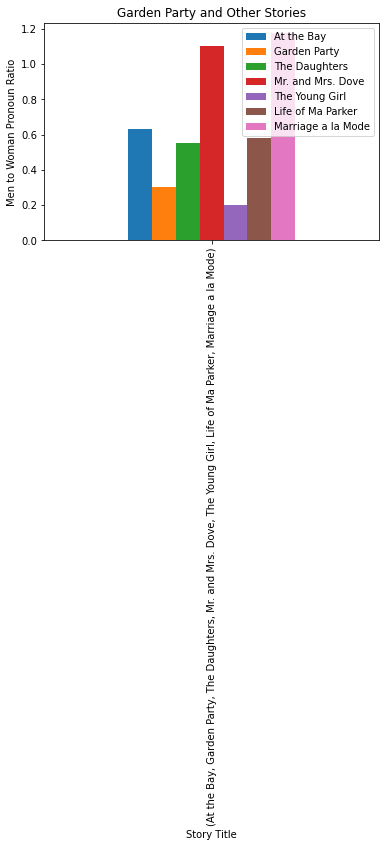

In [74]:

def ratio(tokens):
    pronouns={"female":["her", "hers", "she", "herself"], "male":["he", "his", "him", "himself"]}
    men=0
    women=0
    for token in tokens:
        if token in pronouns["female"]:
            women=women+1
        if token in pronouns["male"]:
            men= men+1
    if women==0:
        return "there are no female pronouns"
    if men==0:
        return "there are no male pronouns"
    else:
        return men/women
    
gardenSplit=gardenparty.split('#')
at_the_bay ="\n".join(gardenSplit[1:27])
daughters_colonel = "\n".join(gardenSplit[29:53])
garden_party = gardenSplit[28]
dove = gardenSplit[54]
younggirl = gardenSplit[55]
maparker= gardenSplit[56]
marriage=gardenSplit[57]
voyage=gardenSplit[58]
brill=gardenSplit[59]
firstball=gardenSplit[60]
singinglesson=gardenSplit[61]
stranger=gardenSplit[62]
bankholiday=gardenSplit[63]
idealfamily=gardenSplit[64]
ladysmaid=gardenSplit[65]

stories = {"At the Bay": at_the_bay, "Garden Party": garden_party,"The Daughters": daughters_colonel,'Mr. and Mrs. Dove': dove, 'The Young Girl': younggirl, 'Life of Ma Parker':maparker, 'Marriage a la Mode':marriage}
stories_2= {'The Voyage': voyage, 'Miss Brill':brill, 'Her First Ball':firstball,'The Singing Lesson':singinglesson, 'The Stranger':stranger, 'Bank Holiday':bankholiday, 'An Ideal Family':idealfamily, 'The Lady’s Maid':ladysmaid}
ratiodict={}
for person,character in stories.items():
    punct=nltk.word_tokenize((character.lower()))
    ratios=ratio(punct)
    ratiodict[person]=ratios
print(ratiodict)
ratioplot=pd.DataFrame(ratiodict, index=[stories.keys()])
ratioplot.plot(kind='bar', title="test")
plt.title("Garden Party and Other Stories")
plt.xlabel("Story Title")
plt.ylabel("Men to Woman Pronoun Ratio")           

{'The Voyage': 0.2602739726027397, 'Miss Brill': 0.22580645161290322, 'Her First Ball': 0.39814814814814814, 'The Singing Lesson': 0.23170731707317074, 'The Stranger': 1.6291390728476822, 'Bank Holiday': 1.8571428571428572, 'An Ideal Family': 3.282051282051282, 'The Lady’s Maid': 0.26582278481012656}


Text(0, 0.5, 'Men to Woman Pronoun Ratio')

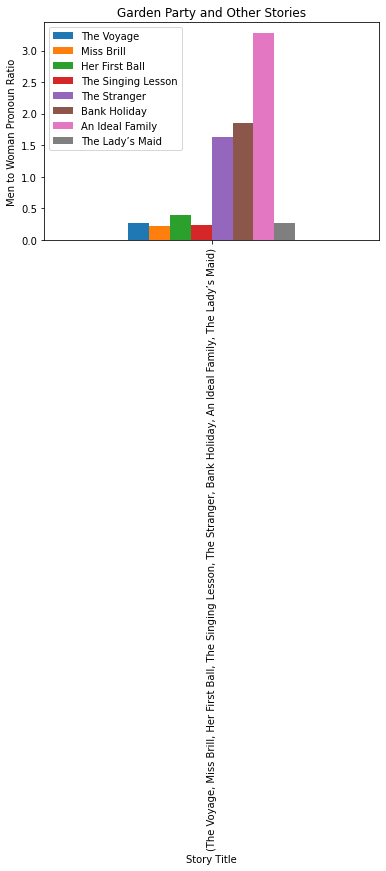

In [75]:
ratiodict={}
for person,character in stories_2.items():
    punct=nltk.word_tokenize((character.lower()))
    ratios=ratio(punct)
    ratiodict[person]=ratios
print(ratiodict)
ratioplot=pd.DataFrame(ratiodict, index=[stories_2.keys()])
ratioplot.plot(kind='bar', title="test")
plt.title("Garden Party and Other Stories")
plt.xlabel("Story Title")
plt.ylabel("Men to Woman Pronoun Ratio")                               

### Ratio of Men to Women Pronouns in all of the Stories

In [76]:
ratiodict={}
story={"Garden Party": gardenparty}
for person,character in story.items():
    punct=nltk.word_tokenize((character.lower()))
    ratios=ratio(punct)
    ratiodict[person]=ratios
print(ratiodict)

{'Garden Party': 0.6401497426298549}


## Total Number of He/She Pronouns in Each Story

In [77]:
def pronouns(tokens):
    pronouns={"female":["her", "hers", "she"], "male":["he", "his", "him"]}
    men=0
    women=0
    for token in tokens:
        if token in pronouns["female"]:
            women=women+1
        if token in pronouns["male"]:
            men= men+1
    print('male pronouns:', men)
    print('female pronouns:', women)
g_pronouns={}
for person,character in stories.items():
    punct=nltk.word_tokenize((character.lower()))
    p=pronouns(punct)
    g_pronouns[person]=p
print(g_pronouns)

male pronouns: 268
female pronouns: 417
male pronouns: 66
female pronouns: 217
male pronouns: 117
female pronouns: 211
male pronouns: 148
female pronouns: 136
male pronouns: 28
female pronouns: 143
male pronouns: 79
female pronouns: 134
male pronouns: 100
female pronouns: 86
{'At the Bay': None, 'Garden Party': None, 'The Daughters': None, 'Mr. and Mrs. Dove': None, 'The Young Girl': None, 'Life of Ma Parker': None, 'Marriage a la Mode': None}


In [78]:
g_pronouns={}
for person,character in stories_2.items():
    punct=nltk.word_tokenize((character.lower()))
    p=pronouns(punct)
    g_pronouns[person]=p
print(g_pronouns)

male pronouns: 36
female pronouns: 144
male pronouns: 21
female pronouns: 93
male pronouns: 43
female pronouns: 107
male pronouns: 19
female pronouns: 82
male pronouns: 243
female pronouns: 150
male pronouns: 26
female pronouns: 14
male pronouns: 122
female pronouns: 39
male pronouns: 21
female pronouns: 75
{'The Voyage': None, 'Miss Brill': None, 'Her First Ball': None, 'The Singing Lesson': None, 'The Stranger': None, 'Bank Holiday': None, 'An Ideal Family': None, 'The Lady’s Maid': None}


### Total Number of He/She Pronouns all of the Stories

In [79]:
g_pronouns={}
for person,character in story.items():
    punct=nltk.word_tokenize((character.lower()))
    p=pronouns(punct)
    g_pronouns[person]=p
print(g_pronouns)

male pronouns: 1342
female pronouns: 2095
{'Garden Party': None}


# Moonstone Analysis

## Ratio of Men to Women Pronouns in Each Narration in Moonstone

{'Betteredge': 1.2275725593667546, 'Clack': 1.0414012738853504, 'Bruff': 1.7828947368421053, 'Blake': 1.5229759299781183, 'Jennings': 3.4012738853503186, 'Cuff': 20.8, 'Candy': 'there are no female pronouns'}


Text(0, 0.5, 'Men to Woman Pronoun Ratio')

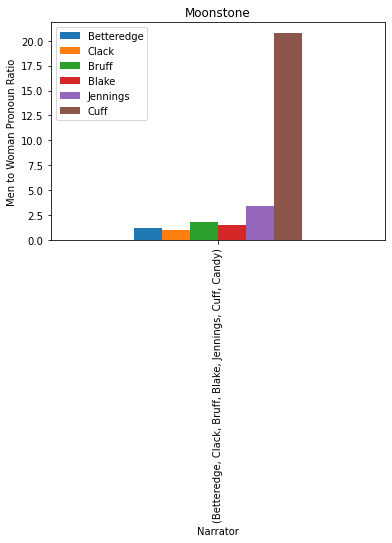

In [80]:
moonstoneparts=moonstone.split('##')
betteredge="\n".join(moonstoneparts[6:29])+"\n"+moonstoneparts[64]
clack="\n".join(moonstoneparts[31:39])                                       
bruff="\n".join(moonstoneparts[40:43])
blake= "\n".join(moonstoneparts[44:53])                                       
cuff="\n".join(moonstoneparts[57:62])                                       
jennings=moonstoneparts[54]    
candy=moonstoneparts[63]    
moonstonenarrators={"Betteredge":betteredge, "Clack":clack, "Bruff":bruff, "Blake":blake, "Jennings":jennings,"Cuff":cuff,"Candy":candy}
ratiodict={}
for person,character in moonstonenarrators.items():
    punct=nltk.word_tokenize((character.lower()))
    ratios=ratio(punct)
    ratiodict[person]=ratios
print(ratiodict)
ratioplot=pd.DataFrame(ratiodict, index=[moonstonenarrators.keys()])
ratioplot.plot(kind='bar', title="test")
plt.title("Moonstone")
plt.xlabel("Narrator")
plt.ylabel("Men to Woman Pronoun Ratio") 
                                      
    

### Ratio of Men to Women Pronouns in Moonstone

In [81]:
ratiodict={}
story_2={"Moonstone": moonstone}
for person,character in story_2.items():
    punct=nltk.word_tokenize((character.lower()))
    ratios=ratio(punct)
    ratiodict[person]=ratios
print(ratiodict)

{'Moonstone': 1.5991174473862866}


## Total Number of He/She Pronouns in Each Narration

In [82]:
m_pronouns={}
for person,character in moonstonenarrators.items():
    punct=nltk.word_tokenize((character.lower()))
    p=pronouns(punct)
    m_pronouns[person]=p
print(m_pronouns)

male pronouns: 1777
female pronouns: 1455
male pronouns: 629
female pronouns: 599
male pronouns: 261
female pronouns: 143
male pronouns: 677
female pronouns: 441
male pronouns: 509
female pronouns: 150
male pronouns: 96
female pronouns: 5
male pronouns: 71
female pronouns: 0
{'Betteredge': None, 'Clack': None, 'Bruff': None, 'Blake': None, 'Jennings': None, 'Cuff': None, 'Candy': None}


### Total Number of He/She Pronouns in Moonstone

In [83]:
g_pronouns={}
for person,character in story_2.items():
    punct=nltk.word_tokenize((character.lower()))
    p=pronouns(punct)
    g_pronouns[person]=p
print(g_pronouns)

male pronouns: 4521
female pronouns: 2821
{'Moonstone': None}


In [84]:
len(moonstone)

1072707

# Alice in Wonderland Analysis

## Ratio of Men to Women Pronouns in Each Chapter of Alice in Wonderland

{'Chapter 1': 'there are no male pronouns', 'Chapter 2': 0.09523809523809523, 'Chapter 3': 0.2, 'Chapter 4': 0.09016393442622951, 'Chapter 5': 0.06493506493506493, 'Chapter 6': 0.3717948717948718, 'Chapter 7': 0.9, 'Chapter 8': 0.2840909090909091, 'Chapter 9': 0.45161290322580644, 'Chapter 10': 1.096774193548387, 'Chapter 11': 1.054054054054054, 'Chapter 12': 0.5056179775280899}


Text(0, 0.5, 'Men to Woman Pronoun Ratio')

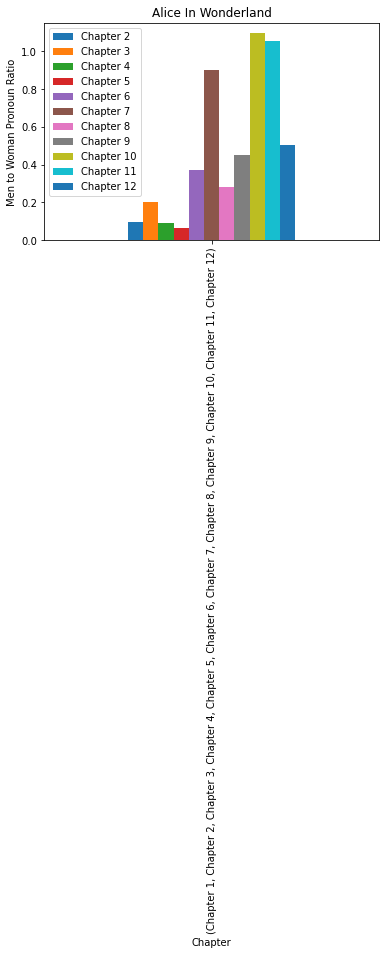

In [85]:
aliceLowered = aliceinwonderland.lower()
   
aliceSplit = aliceinwonderland.split('CHAPTER ')
chapter_1= aliceSplit[1]
chapter_2= aliceSplit[2]
chapter_3 = aliceSplit[3]
chapter_4=aliceSplit[4]
chapter_5=aliceSplit[5]
chapter_6=aliceSplit[6]
chapter_7=aliceSplit[7]
chapter_8=aliceSplit[8]
chapter_9=aliceSplit[9]
chapter_10=aliceSplit[10]
chapter_11=aliceSplit[11]
chapter_12=aliceSplit[12]

chapters={"Chapter 1": chapter_1, "Chapter 2": chapter_2, "Chapter 3": chapter_3, "Chapter 4":chapter_4, "Chapter 5":chapter_5,"Chapter 6":chapter_6,"Chapter 7":chapter_7, "Chapter 8":chapter_8, "Chapter 9":chapter_9,"Chapter 10":chapter_10,"Chapter 11":chapter_11,"Chapter 12":chapter_12}
ratiodict={}
for person,character in chapters.items():
    punct=nltk.word_tokenize((character.lower()))
    ratios=ratio(punct)
    ratiodict[person]=ratios
print(ratiodict)
ratioplot=pd.DataFrame(ratiodict, index=[chapters.keys()])
ratioplot.plot(kind='bar', title="test")
plt.title("Alice In Wonderland")
plt.xlabel("Chapter")
plt.ylabel("Men to Woman Pronoun Ratio") 

### Ratio of Men to Women Pronouns in Alice in Wonderland

In [86]:
ratiodict={}
story_3={"Alice in Wonderland": aliceinwonderland}
for person,character in story_3.items():
    punct=nltk.word_tokenize((character.lower()))
    ratios=ratio(punct)
    ratiodict[person]=ratios
print(ratiodict)

{'Alice in Wonderland': 0.30405405405405406}


## Total Number of He/She Pronouns in Each Chapter

In [87]:
a_pronouns={}
for person,character in chapters.items():
    punct=nltk.word_tokenize((character.lower()))
    p=pronouns(punct)
    a_pronouns[person]=p
print(a_pronouns)

male pronouns: 0
female pronouns: 106
male pronouns: 9
female pronouns: 97
male pronouns: 8
female pronouns: 36
male pronouns: 11
female pronouns: 105
male pronouns: 5
female pronouns: 70
male pronouns: 28
female pronouns: 69
male pronouns: 36
female pronouns: 35
male pronouns: 23
female pronouns: 86
male pronouns: 28
female pronouns: 56
male pronouns: 34
female pronouns: 29
male pronouns: 39
female pronouns: 34
male pronouns: 43
female pronouns: 82
{'Chapter 1': None, 'Chapter 2': None, 'Chapter 3': None, 'Chapter 4': None, 'Chapter 5': None, 'Chapter 6': None, 'Chapter 7': None, 'Chapter 8': None, 'Chapter 9': None, 'Chapter 10': None, 'Chapter 11': None, 'Chapter 12': None}


### Total Number of He/She Pronouns in Alice in Wonderland

In [88]:
g_pronouns={}
for person,character in story_3.items():
    punct=nltk.word_tokenize((character.lower()))
    p=pronouns(punct)
    g_pronouns[person]=p
print(g_pronouns)

male pronouns: 264
female pronouns: 805
{'Alice in Wonderland': None}


# Does Pronoun Usage in an Author’s Text Give Insight to an Author’s Background

## Abstract
 For my final project I plan on showing how the pronoun usage in an Author’s text can give insight to an author’s background focused on texts primarily from the 19th century. My corpus includes *Alice in Wonderland*, *The Moonstone*, and *Garden Party and Other Stories*. *Alice in Wonderland* was published in 1865 by Lewis Carroll and has about 29,610 words. *The Moonstone* was published in 1868 by Wilkie Collins and has about 87,750 words. And *Garden Party and Other Stories* was published in 1922 as a collective of work by Katherine Mansfield, however was speculated to be written earlier, and has a total of about 47, 541 words. Knowing that these texts vary in length, I will be comparing the ratio of male to female pronouns and seeing if this analysis will give any insight about the Author and their background and if they had pro-feminist or misogynistic views.

## The Victorian Era and What that Meant for Literature

When deciding to do this project, I knew I had to pick a large corpus that still entailed some variety. I wanted to choose texts that I was familiar with so I would be able to analyze them to the fullest extent. With this in mind, I also wanted to choose texts that came from a similar era of time. With two of the texts being published in the 1860s and Mansfield being born in the 1880’s, I decided that I wanted to focus on 19th century literature. From 1837 to 1901 was known to be the Victorian Era. 

The Victorian Era, in British History, was named for the time period of Queen Victoria’s reign and was characterized by a class based society where more and more people were able to vote, the state and economy flourished, and Britain was seen as the most powerful empire in the world. During this time period, Britain was a powerful nation with a lot of rich culture in which many authors would be able to take up writing and literature as a job. Some considered the literature at this time to be the Golden Age for English Literature. Literature and writing flourished so much at this time that the Victorian Era became its own literary genre. Writing from the Victorian era was able to show the many different transformations of English life, ranging from economic, scientific, and even technological changes and advancements. These advancements affected the class structure and even the roles of religion in Britain. 

In the Victorian Era a wide range of literature became heavily present and influential to many authors. For example, prose fiction was very influential to Wilkie Collins during this time. Charles Dickens was one of the most famous Victorian authors. With a focus on characterization, Dickens became very popular to this day and still remains one of the most popular and respected authors of the world. His novels held satirical edge and themes and he tried to add humor to them. However, even though Charles Dickens was very respected in literature, he was considered a misogynist. In 2020, an article published in the Mail, it talked about how the novelist was cruel to his wife, hated his mother and also had an affair. Even though, in modern day this is seen as very misogynistic but was the norm and typical for the age. Collins first met Dickens in about 1851 when they were 27 and 39. Collins joined the Dickens circle in 1851 and Dickens' first recorded letter to Collings was on March 12 in 1851. Collins would often rehearse with the rest of Dicken’s company. They both remained friends until Dicken’s death in 1870. Aften Dicken’s death, Collin still continued to have a relationship with Dicken’s late wife.

The Victorian Era was able to utilize the abstracts and selfish focus of the Romantic Era while also directing attention to social issues. Some social issues that were brought to attention in this era, is the male dominated world of literature. Women writing in this time often had to use masculine pseudonyms because of the idea of women staying at home for their husbands. However, because of this social issue and the industrial revolution there was an outbreak of female authors, including Mansfield, and even authors writing about female protagonists in their stories, such as Lewis Carroll. However, with these people speaking up about the inequalities, there were still many authors being silent on the issue or even fighting for the latter.

## The Authors

In this section, I will be discussing the authors’ backgrounds and how their backgrounds could have influenced their writing and texts. 

Lewis L. Dogson was an inspiring author during the Victorian Era. He went by the pen name of Charles Carroll was the author of Alice in Wonderland and was published in 1858. Lewis Carroll was not just an English fiction writer but also created games and also a lecturer in mathematics. However, beyond all of this he loved creating stories for children.  Carroll was the eldest of 11 children and would use his siblings as an audience for his entertainment, whether it be writing or his games. Carroll was often neglected in his childhood due to the mass amount of siblings that he had. He suffered from a bad stammer, but he would be very vocally fluent when speaking with children. When Carroll was younger he often did not have a childhood because of him taking care of his siblings and working on mathematics. He never really had relationships with young people during his adult years but was very interested and inspired by them. Because of this inspiration, he wrote Alice in Wonderland. Carroll learned that he loved to entertain children even in his older years. It is speculated that Carroll wrote Alice in Wonderland on a rowboat in Europe with his friend’s daughter Alice, he was able to see her joy of being young and all of her memories of the fantastic tales of dream worlds she has. He promised he would write the story down for her. Through a series of coincidences the story fell in the hands of Henry Kingsley who convinced Carroll to publish it. Carroll was seen ahead of his time because he wrote his stories through a feminist lens and chose to empower his his audience by his themes. Due to this, Carroll was seen as a feminist because of his choice of language and themes that he catered to his novel. The characters that he wrote were strong, capable, and resilient girls who often got themselves out of situations and troubles that they didn't like.

As for Wilkie Collins, he was a very important author during this same era. He wrote one of the first english detective novels that was published in1868. However, his first published work was a memoir to his father. Wilkie Collins became addicted to opium during his peak of population. Collins took opium in the early 1860s to help alleviate the symptoms of gout pain. There were no legal restrictions on opium until 1868 and was usually used in many medicines at the time. Collins would take very large doses until he became addicted and dependent on it. Very interestingly, the nightmares caused by opium were very vividly described by Jennings in *The Moonstone* where the drugs were such an important theme in the novel. Collins often wrote many books under the influence of opium and when finishing the work he would rarely recognize it as his own work.  Even through his opium addiction, he still published these works. His novels often contained social critique and dynamic, multidimensional characters where he would include the gender norms for the time of Victorian society.  Having not read *The Women in White* but having read *The Moonstone*, I noticed the novel focused on an anxious male narrator and often oppressing and silencing the women in the text because their words are being rewritten or their perspectives being changed. The women in the novels also had little control over their lives and had no power due to the patriarchal system. They were forced into marriages and were often talked about in a sexual or physical aspect rather than talking about them as a whole person. Women were also described as delicate and morally vulnerable and were in protection from the harshness of life. As seen through his lens, he made women seem unempowered and without control. 

The last that I plan on analyzing is Katherine Mansfield. Katherine wrote most of her literature in the early 1900s but published her work *The Garden Party and Other Stories* in 1922. Katherine was one of the most highly regarded short story writers of the 20th century. She played a large role in shaping modernism and experimenting with subjects, style , and themes in her work that often re-defined the genre. On top of her short stories, she also wrote letters, reviews, and journals. Katherine was born in New Zealand and was the third child of a prosperous businessman and banker. She was able to get an education at Queens College where she could excel in the liberal environment while also writing stories and helping with the school’s magazine. She got pregnant by a young musician and then married a singing teacher only to leave him right after the wedding. Mansfield suffered from anxiety, sexuality, and existentialism. She became very ill with tuberculosis in 1918. She finally divorced her first husband and married and editor of *The Athenaeum*. Even after she was wed, she was still cared for by Ida and later started calling her, her wife. In 1920, she finally published all of her works in *The Garden Party and Other Stories* and in just a matter of three years was pronounced dead from her illness. Throughout Katherine’s career she was seen as a feminist and ahead of her time. She often wrote her stories in a third person omniscient narration and showed the characters through changing thoughts, memories, and even sensations. She was see as pro feminist because of her strong usage of female characters and being able to use her privilege to write stories that were attractive to the female gender.

## Textual Analysis on Three Novels by the Authors I Chose

For my project, I chose to do textual analysis on the authors that I chose including Lewis Carroll, Wilkie Collins, and Katherine Mansfield. My corpus included *Alice in Wonderland* written by Lewis Carroll, published in 1865 with about 29,610 words, *The Moonstone* by Wilkie Collins which was published in 1868 with about 87,750 words, and *Garden Party and Other Stories* by Katherine Mansfield published in 1922 with about 47,541 words.To analyze each novel, I was able to separate the txt file into all of the stories/ narrations/ chapters and analyze the male to female pronoun ratio and relationship in each story. I defined the male pronoun to be he, his, him, and himself and the female pronoun to be she, her, hers, and herself. From there, I created a for loop to count the number of female pronouns and male pronouns in each story/ narration/ chapter and even the entire story as a whole.


The first novel that I analyzed was *Garden Party and Other Stories*. From my analysis, I was able to see the strong usage of female pronouns in each individual story. Even though these stories were third person omniscient narrations with a variation of main characters, almost all of the stories continue to use more female pronouns than male. There were a few exceptions to this pattern, which include *An Ideal Family*. This story had a ratio of 3.2 male pronouns to female pronouns. However, as a whole *The Garden Party and Other Stories* had a ratio of 0.64 male pronouns for every female pronoun being used. This analysis was able to back my claim of Mansfield having a feministic ideology and being ahead of her time. Even though she was surrounded by a lot of men in her field, she was still focused on writing about female characters in her short stories and using her privilege to help more female writers become more active.

The next novel that I analyzed was *The Moonstone*. This novel was extremely interesting to analyze especially in terms of the female to male pronouns being used. With no specific main character being named in the novel and a good amount of female characters, I would have hoped to see an equal spread of male to female pronouns. However, for the narrations in the novel, all of them had a higher usage of male pronouns than female. It was so shocking that even Candy, a character in the novel, utilized zero female pronouns during the entirety of his narration. For the novel as a whole, we were able to see a usage of 1.599 male pronouns for every 1 female pronoun. This analysis was also able to back up the claim that Collins often stayed silent on the inequality of women and men at the time. His silence is seen as oppression to women. His influence by Dickens did also not help his writing style of favoring men over women either.

Lastly, I was able to analyze *Alice in Wonderland*. I broke this book down by its chapters and analyzed the pronoun usage then. Knowing this book had a main female character, I expected to see a large range of female pronouns. However, I also expected to see an even amount of male pronouns due to the variety of characters in the novel. Interestingly enough, chapter one used no male pronouns and 106 female pronouns. The rest of the chapters unanimously used more female pronouns than male, with the exception of Chapters 10 and 11, which used an equal amount of male and female pronouns. For the book as a whole, *Alice in Wonderland* used 0.304 male pronouns for every female pronoun. This analyzation is also able to back up the claim that Carroll was a feminist for his time. He decided to write and publish a novel with a female protagonist and made the main character a strong and resilient young girl. 

In Conclusion, I was able to see the ratio of female to male pronouns in each work of literature. Doing my research prior, I learned that both Lewis Carroll and Katherine Mansfield have a pro-feminist discography of work while WIlkins has not. There have been many articles that back this argument, so I am happy I was able to use my textual analysis to be able to back up these claims.
